# 0. 폰트 설정

In [ ]:
# =========================================================
# 0. 폰트 설정 (그래프 코드랑 같은 셀에 두는 걸 추천)
# =========================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/content/NanumBarunGothic.ttf"

# 1) 폰트 파일에서 이름 가져오기
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
print("폰트 이름:", font_name)

# 2) matplotlib 폰트 매니저에 '등록'
fm.fontManager.addfont(font_path)

# 3) 정말 등록됐는지 확인
nanum_fonts = [f.name for f in fm.fontManager.ttflist if "Nanum" in f.name]
print("matplotlib이 인식한 나눔 계열 폰트들:", nanum_fonts)

# 4) 전역 기본 폰트로 설정
plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 깨짐 방지


FileNotFoundError: [Errno 2] No such file or directory: '/content/NanumBarunGothic.ttf'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1. 성장 도표 및 사이즈를 통한 평균 사용 개월 수 계산

폰트 이름: NanumBarunGothic
✅ 데이터 로드 성공!

=== 📊 분석 결과: 사이즈별 평균 착용 기간 ===
성별      남아  여아
사이즈           
50       1   1
60       2   3
70       2   2
80       3   3
85/90    3   4
95/100   4   4
100      6   6
110     14  14
120      8   8
130     12  12
140     10  11
150      7   7
160     22  21


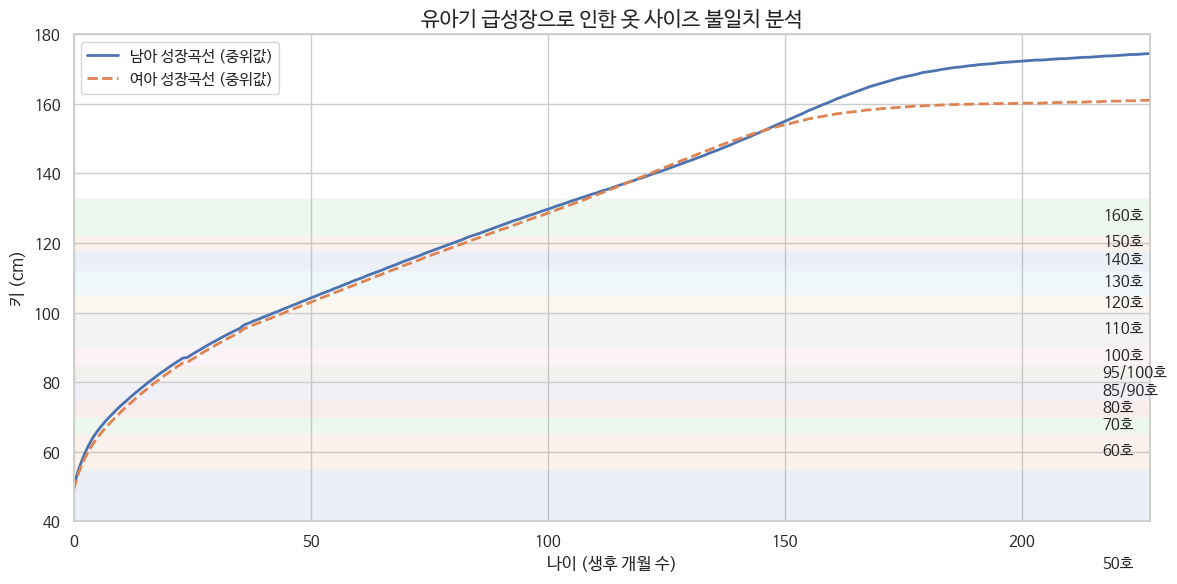

In [ ]:
# 0. 폰트 & 스타일 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

font_path = '/content/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
print("폰트 이름:", font_name)

plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False
sns.set_theme(style="whitegrid", font=font_name, rc={"axes.unicode_minus": False})

# =========================================================
# 1. 데이터 로드 & 전처리
# =========================================================
import pandas as pd
import numpy as np
import os

filename = '성장도표 데이터.xlsx'

def smart_load(file_path):
    if not os.path.exists(file_path):
        if os.path.exists('성장도표 데이터.xlsx'):
            file_path = '성장도표 데이터.xlsx'
        else:
            return None, "❌ 파일을 찾을 수 없습니다. 업로드된 파일명을 확인해주세요."

    try:
        if file_path.endswith('.csv'):
            df = pd.read_csv(file_path, header=[0, 1])
        else:
            df = pd.read_excel(file_path, header=[0, 1])
        return df, "✅ 데이터 로드 성공!"
    except Exception as e:
        try:
            df = pd.read_csv(file_path, header=[0, 1], encoding='cp949')
            return df, "✅ 데이터 로드 성공! (cp949)"
        except:
            return None, f"❌ 파일 읽기 실패: {e}"

df, msg = smart_load(filename)
print(msg)

if df is not None:
    # -----------------------------------------------------
    # 2. 전처리
    # -----------------------------------------------------
    df_clean = pd.DataFrame()
    flat_cols = [f"{str(c[0])}_{str(c[1])}" for c in df.columns]
    df.columns = flat_cols

    df_clean['성별'] = df.iloc[:, 0]
    df_clean['개월수'] = df.iloc[:, 2]

    height_col = [c for c in flat_cols if '50th' in c and ('신장' in c or '키' in c)]

    if height_col:
        df_clean['평균키_cm'] = df[height_col[0]]
    else:
        print("⚠️ 컬럼 자동 감지 실패, 위치 기반으로 데이터를 가져옵니다.")
        df_clean['평균키_cm'] = df.iloc[:, 12]

    df_boy = df_clean[df_clean['성별'] == 1].sort_values('개월수')
    df_girl = df_clean[df_clean['성별'] == 2].sort_values('개월수')

    # -----------------------------------------------------
    # 3. 사이즈별 착용기간 계산
    # -----------------------------------------------------
    size_specs = [
    {'Size': '50', 'Min': 0,   'Max': 55},
    {'Size': '60',    'Min': 55,  'Max': 65},
    {'Size': '70',    'Min': 65,  'Max': 70},
    {'Size': '80',    'Min': 70,  'Max': 75},
    {'Size': '85/90', 'Min': 75,  'Max': 80},
    {'Size': '95/100','Min': 80,  'Max': 85},
    {'Size': '100',   'Min': 85,  'Max': 90},
    {'Size': '110',   'Min': 90,  'Max': 100},
    {'Size': '120',   'Min': 100, 'Max': 105},
    {'Size': '130',   'Min': 105, 'Max': 112},
    {'Size': '140',   'Min': 112, 'Max': 118},
    {'Size': '150',   'Min': 118, 'Max': 122},
    {'Size': '160',   'Min': 122, 'Max': 133}
    ]
    size_df = pd.DataFrame(size_specs)

    def get_duration(growth_data, label):
        res = []
        for _, row in size_df.iterrows():
            in_range = growth_data[
                (growth_data['평균키_cm'] >= row['Min']) &
                (growth_data['평균키_cm'] < row['Max'])
            ]
            if not in_range.empty:
                res.append({
                    '성별': label,
                    '사이즈': row['Size'],
                    '기간(개월)': in_range['개월수'].max() - in_range['개월수'].min()
                })
        return pd.DataFrame(res)

    res_final = pd.concat([get_duration(df_boy, '남아'),
                           get_duration(df_girl, '여아')])

    print("\n=== 📊 분석 결과: 사이즈별 평균 착용 기간 ===")
    print(
        res_final
        .pivot(index='사이즈', columns='성별', values='기간(개월)')
        .reindex(['50','60','70','80','85/90','95/100','100','110','120','130','140','150','160'])
    )

    # -----------------------------------------------------
    # 4. 시각화
    # -----------------------------------------------------
    plt.figure(figsize=(12, 6))

    limit_month = 227
    plt.plot(df_boy['개월수'], df_boy['평균키_cm'],
             label='남아 성장곡선 (중위값)', linewidth=2)
    plt.plot(df_girl['개월수'], df_girl['평균키_cm'],
             label='여아 성장곡선 (중위값)', linewidth=2, linestyle='--')

    for _, row in size_df.iterrows():
        plt.fill_between([0, limit_month], row['Min'], row['Max'], alpha=0.1)
        plt.text(limit_month - 10, (row['Min'] + row['Max'])/2 - 1, f"{row['Size']}호",
                 fontweight='bold', fontsize=11)

    plt.title('유아기 급성장으로 인한 옷 사이즈 불일치 분석', fontsize=15, fontweight='bold')
    plt.xlabel('나이 (생후 개월 수)', fontsize=12)
    plt.ylabel('키 (cm)', fontsize=12)
    plt.legend(loc='upper left')
    plt.xlim(0, limit_month)
    plt.ylim(40, 180)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np

# =========================================================
# 1. 데이터 로드 및 기본 전처리
# =========================================================
filename = '가구주_연령별_가구당_월평균_가계수지__전국_1인이상__20251121173907.xlsx - 데이터.csv'

try:
    df = pd.read_csv(filename, header=[0, 1])
except:
    filename = '가구주_연령별_가구당_월평균_가계수지__전국_1인이상__20251121173907.xlsx'
    df = pd.read_excel(filename, header=[0, 1])

# 컬럼명 정리
new_columns = []
for col in df.columns:
    if "Unnamed" in str(col[0]):
        new_columns.append(col[1])
    else:
        new_columns.append(col[0])
df.columns = new_columns

# 컬럼명 변경 및 연령대 채우기
df.rename(columns={df.columns[0]: '가구주연령', df.columns[1]: '항목'}, inplace=True)
df['가구주연령'] = df['가구주연령'].ffill()

# =========================================================
# 2. 분석 대상 필터링 (교육 추가!)
# =========================================================
target_ages = [
    '전체 평균',
    '39세이하가구',
    '40~49세가구',
    '50~59세가구',
    '60세이상 가구',
    '65세이상 가구'
]

# 🚨 '10.교육' 항목 추가
target_items = [
    '가구원수',
    '소득',
    '소비지출',
    '03.의류 · 신발',
    '10.교육'
]

# 공백 제거 및 필터링
df['가구주연령'] = df['가구주연령'].str.strip()
df['항목'] = df['항목'].str.strip()

df_filtered = df[
    (df['가구주연령'].isin(target_ages)) &
    (df['항목'].isin(target_items))
].copy()

# =========================================================
# 3. 데이터 연산 (기간별 평균)
# =========================================================
time_cols = df_filtered.columns[2:]

for col in time_cols:
    df_filtered[col] = pd.to_numeric(
        df_filtered[col].astype(str).str.replace(',', ''), errors='coerce'
    )

df_filtered['Total_Average'] = df_filtered[time_cols].mean(axis=1)

# =========================================================
# 4. 피벗 테이블 및 핵심 지표(KPI) 계산
# =========================================================
result_df = df_filtered.pivot(
    index='가구주연령',
    columns='항목',
    values='Total_Average'
)

result_df = result_df.reindex(target_ages)

# --- [기존] 의류비 지표 ---
result_df['1인당_의류비'] = result_df['03.의류 · 신발'] / result_df['가구원수']
result_df['소비대비_의류비중(%)'] = (result_df['03.의류 · 신발'] / result_df['소비지출']) * 100
# 소득 대비 의류비 비중 (지출 강도)
result_df['소득대비_의류비중(%)'] = (result_df['03.의류 · 신발'] / result_df['소득']) * 100

# --- [신규] 교육비 지표 추가 🎓 ---
# 1. 소비지출 대비 교육비 비중 (교육열 지표)
result_df['소비대비_교육비중(%)'] = (result_df['10.교육'] / result_df['소비지출']) * 100

# 2. 소득 대비 교육비 비중 (가계 부담 지표)
result_df['소득대비_교육비중(%)'] = (result_df['10.교육'] / result_df['소득']) * 100

# (보너스) 1인당 교육비
result_df['1인당_교육비'] = result_df['10.교육'] / result_df['가구원수']


# =========================================================
# 5. 결과 출력
# =========================================================
print("\n========== 📊 [분석 결과] 의류비 & 교육비 가계 부담 지표 ==========")

# 보고 싶은 컬럼 순서 정리
display_cols = [
    '가구원수',
    '소득',
    '03.의류 · 신발',
    '1인당_의류비',
    '소비대비_의류비중(%)',
    '소득대비_의류비중(%)',
    '10.교육',
    '1인당_교육비',
    '소비대비_교육비중(%)',
    '소득대비_교육비중(%)'
]

final_table = result_df[display_cols].round(1)
print(final_table)

# CSV 저장
final_table.to_csv('연령별_의류_교육비_분석.csv', encoding='utf-8-sig')
print("\n✅ '연령별_의류_교육비_분석.csv' 저장 완료!")


========== 📊 [분석 결과] 의류비 & 교육비 가계 부담 지표 ==========
항목        가구원수         소득  03.의류 · 신발  1인당_의류비  소비대비_의류비중(%)  소득대비_의류비중(%)  \
가구주연령                                                                        
전체 평균      2.3  4802700.1    138441.0  59705.0           5.1           2.9   
39세이하가구    2.0  4528799.3    155531.2  76616.3           6.0           3.4   
40~49세가구   3.0  6050302.1    188415.2  62923.1           5.3           3.1   
50~59세가구   2.6  5933062.5    160070.5  61580.4           5.1           2.7   
60세이상 가구   1.9  3486626.2     82276.2  42782.6           4.3           2.4   
65세이상 가구   1.8  2856529.9     65509.4  35994.2           3.9           2.3   

항목           10.교육   1인당_교육비  소비대비_교육비중(%)  소득대비_교육비중(%)  
가구주연령                                                     
전체 평균     207786.7   89611.5           7.7           4.3  
39세이하가구   138132.6   68045.6           5.3           3.1  
40~49세가구  526896.5  175962.1          14.9           8.7  
50~59세가구  272595.9  104869.8